In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
atpVel = pd.read_csv('data/v11nspd_std273s5.csv', names=['spd','std']) # speed calculated from Ts 200 at ATP 2000 on account of a brief detach
ATP = np.array([500,1000,1500,2000,2500,3000,3500,4000])

$Michaelis-Menten\ kinetics:\ v=\frac{ATP\times v_{max}}{K_m+ATP}$

In [3]:
atp = ATP; spd10 = atpVel['spd']; #NB: atp is the substrate [s]

def michaelis10(atp,km):
    return( (atp*spd10.max())/(atp+km) )
popt10, pcov10 = curve_fit(michaelis10, atp, spd10)
kmVal10 = popt10[0]
yVal10 = ( atp*spd10.max() ) / (kmVal10+atp) # yVakl V = Vmax

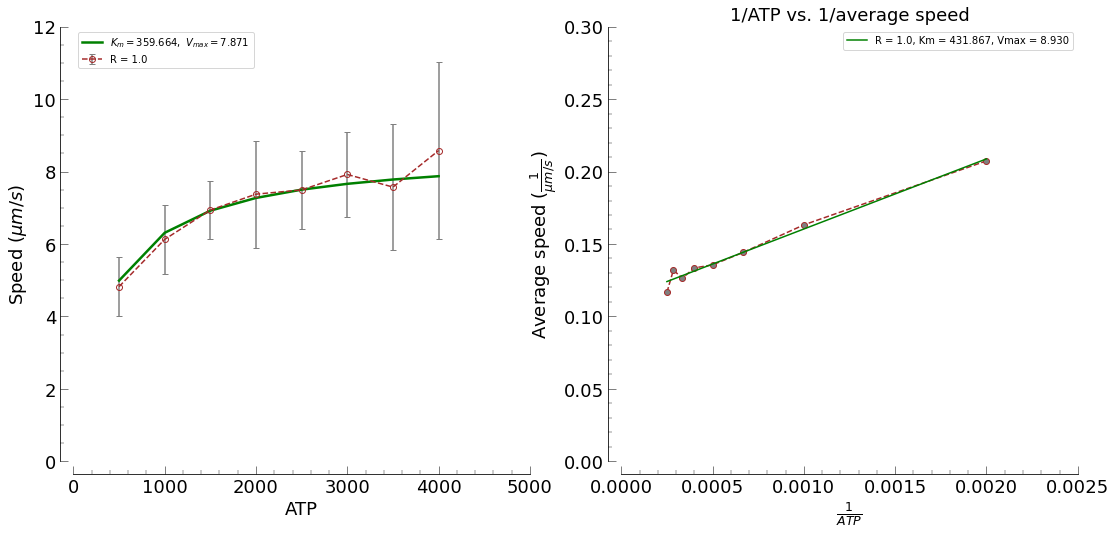

In [5]:

fig, ax = plt.subplots(1,2,figsize=(18,8))

ax[0].errorbar(ATP,atpVel['spd'],atpVel['std'], capsize=3, linestyle='--', color='brown', marker='o', markerfacecolor='none', ecolor='grey', label='R = 1.0')
ax[0].plot(ATP,michaelis10(atp,*popt10),'g-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmVal10,np.max(yVal10)))

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].set_yticks(np.arange(0,13,2))
ax[0].set_xticks(np.arange(0,5501,1000))
ax[0].tick_params(labelsize=18)

ax[0].set_xlabel('ATP', fontsize=18)
ax[0].set_ylabel('Speed ($\mu m/s$)', fontsize=18)

ax[0].legend(loc='upper left')

ax[0].spines['bottom'].set_position(('axes',-0.03))
ax[0].spines['left'].set_position(('axes',-0.03))
ax[0].spines['left'].set_bounds(0,12)
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

#=========================================================

xx = 1/ATP; yy = 1/atpVel['spd']

slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
vmax = 1/intercept; km = slope/intercept

ax[1].plot(xx,yy, marker='o', color='brown', linestyle='--', markerfacecolor='grey')
ax[1].plot(xx,(slope*xx+intercept), color='green', label='R = 1.0, Km = %.3f, Vmax = %.3f'%(km,vmax))

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].set_xticks(np.arange(0,0.003,step=0.0005))
ax[1].set_yticks(np.arange(0,0.31,step=0.05))
ax[1].tick_params(labelsize=18)

ax[1].set_title('1/ATP vs. 1/average speed', fontsize=18)
ax[1].set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax[1].set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
ax[1].legend(loc='best')

ax[1].spines['bottom'].set_position(('axes',-0.03))
ax[1].spines['left'].set_position(('axes',-0.03))
ax[1].spines['left'].set_bounds(0,0.3)
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major')
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor')

#==========================================================

plt.savefig('fig/ATPspeed.png', format='png', dpi=700, bbox_inches='tight')

plt.show()

In [6]:
!jupyter nbconvert ChangingATP.ipynb --no-input --to html

[NbConvertApp] Converting notebook ChangingATP.ipynb to html
[NbConvertApp] Writing 627893 bytes to ChangingATP.html
